Dans le notebook 1 nous avons pu voir qu'il y'a peu de correlations linéaires entre nos features, c'est pourquoi nous allons
tenter de réduire encore la dimentionalité de notre jeu de données et cette fois en utilisant l'algorithm ISOMAP

In [4]:

# Imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing

from sklearn.manifold import Isomap

# Visualization
import plotly.express as px # for data visualization
import matplotlib.pyplot as plt 


In [18]:
pip install plotly

In [5]:
processed_data = pd.read_csv('encoded.csv')

In [32]:
processed_data.shape

(126527, 15)

In [59]:
processed_data.head()

,review_score,product_category_fashion,product_category_groceries,product_category_home_$_electonics,product_category_leisure,payment_type_boleto,payment_type_credit_card,Region_Central_West_region,Region_Northeast_region,Region_South_region,Region_Southesar_region,delivery_season_autumn,delivery_season_spring,delivery_season_summer,delivery_season_winter
0,0.214824,-0.103061,-0.224695,0.505094,-0.149486,-0.18924,0.231279,-0.05421,-0.090985,-0.137346,0.306061,-0.149794,0.702309,-0.336244,-0.21627
1,-0.035176,-0.103061,0.775305,-0.494906,-0.149486,-0.18924,0.231279,-0.05421,-0.090985,-0.137346,0.306061,-0.149794,0.702309,-0.336244,-0.21627
2,-0.285176,-0.103061,0.775305,-0.494906,-0.149486,-0.18924,0.231279,-0.05421,-0.090985,0.862654,-0.693939,-0.149794,0.702309,-0.336244,-0.21627
3,-0.035176,-0.103061,-0.224695,0.505094,-0.149486,-0.18924,0.231279,-0.05421,-0.090985,-0.137346,-0.693939,0.850206,-0.297691,-0.336244,-0.21627
4,0.214824,-0.103061,-0.224695,0.505094,-0.149486,-0.18924,0.231279,-0.05421,-0.090985,-0.137346,0.306061,0.850206,-0.297691,-0.336244,-0.21627


Réduction de dimentions à l'aide d'ISOMAP (Isometric Mapping)
C'est un algorithm de ML non supervisé de réduction de dimention non  linéaire.

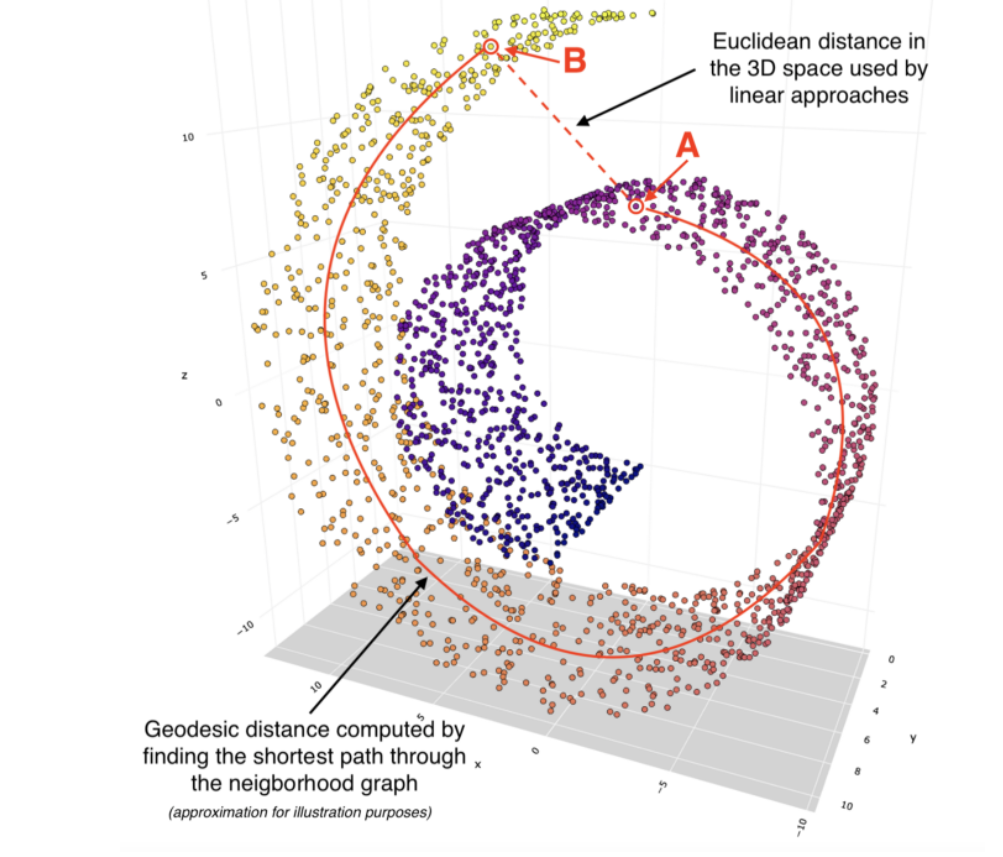

comment marche ISOMAP ?
1) cette technique utilise l'approche de KNN pour touver le voisin le plus proche pour chaque point 
2) Ensuite Construit le graphique en focntion des points voisins , c'est à dire les points les plus proches sont connéctés et ceux éloignés ne sont pas connéstés
3) Calcule la plus courte distance entre les nodes ( les pairs de points similaires)
4) Utilise la méthode MDS Multidimentional scaling pour calculer les axes qui permettent de representer les données avec moins de dimentions.
   Ces axes permettent de placer les points de données de telle façon à ce que les distances entre les points sont préservées au mieux.


In [149]:
# Réduction dimentions 
embed9 = Isomap(n_components=15, n_jobs = 4, n_neighbors = 5)
embed9.fit(processed_data.iloc[0:5000,:])
X_isomap9 = embed9.transform(processed_data)

### Selection de meilleurs features avce le test de variance

In [151]:
X_isomap9.var(axis=0)

array([6.31841546, 2.74359324, 1.94722279, 0.95038319, 0.79852541,
       0.66165012, 0.39164174, 0.3437785 , 0.23095826, 0.16700062,
       0.20426156, 0.12168553, 0.10485279, 0.10753553, 0.08940316])

In [174]:
# Créeer un dataframe pour les dimentions réduites
reduced_data = pd.DataFrame(X_isomap9, columns=processed_data.columns)

In [154]:
# Transformer de Sklearn pour faire la seléction de variables

from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.15)
selector.fit_transform(X_isomap9)
selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False])

In [158]:
cols_to_keep = np.array(processed_data.columns)[selector.get_support()]

In [161]:
cols_to_keep

array(['review_score', 'product_category_fashion',
       'product_category_groceries', 'product_category_home_$_electonics',
       'product_category_leisure', 'payment_type_boleto',
       'payment_type_credit_card', 'Region_Central_West_region',
       'Region_Northeast_region', 'Region_South_region',
       'Region_Southesar_region'], dtype=object)

In [175]:
reduced_data1= reduced_data[cols_to_keep]

In [176]:
reduced_data1.head()

,review_score,product_category_fashion,product_category_groceries,product_category_home_$_electonics,product_category_leisure,payment_type_boleto,payment_type_credit_card,Region_Central_West_region,Region_Northeast_region,Region_South_region,Region_Southesar_region
0,0.029439,-0.130457,0.031594,0.112309,0.044702,-0.009400,0.018151,-0.005535,0.002763,0.002059,0.011049
1,0.029439,-0.130457,0.031594,0.112309,0.044702,-0.009400,0.018151,-0.005535,0.002763,0.002059,0.011049
2,-4.966511,1.973634,9.459372,2.412930,-1.605676,-1.785153,1.014250,0.595454,-0.060669,-0.930738,0.392915
3,0.029420,-0.130249,0.031528,0.111821,0.044471,-0.009338,0.017968,-0.005455,0.002714,0.002009,0.010769
4,0.029439,-0.130457,0.031594,0.112309,0.044702,-0.009400,0.018151,-0.005535,0.002763,0.002059,0.011049


## Calcule de silhouette score afin de définir le nombre de clusters optimal

Le score de silhouette varie de -1 à 1.

        - Un score de 1 signifie que les points de données forment un cluster compacte et ils sont éloignés des autres clusters.
        - Avec un score qui se rapproche de -1 les clusters sont malformés et les points ne sont pas disposés de manière compacte.
        - Un score de 0 signifie des clusters qui se chevauchent.



In [37]:
silhouette_isomap =  {}
for k in range(2, 9):
    # seed of 42 for reproducibility.
    kmeans = KMeans(n_clusters=k, max_iter=300,
                    init='k-means++', 
                     n_init=9,  
                     tol=0.0001, 
                     precompute_distances='auto', 
                     verbose=0, 
                     random_state=1, 
                     copy_x=True, 
                     n_jobs=1, 
                     algorithm='auto').fit(X_isomap9)
    if k == 3: labels = kmeans.labels_
    clusters = kmeans.labels_
    
    silhouette_isomap[k] = silhouette_score(X_isomap9,clusters)

C:\Users\adele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning:

'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect

C:\Users\adele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).

C:\Users\adele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning:

'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect

C:\Users\adele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).

C:\Users\adele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning:

'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect

C:\Users\ade

In [38]:
silhouette_isomap

{2: 0.7788910767959927,
 3: 0.7978339006510469,
 4: 0.8119755583317202,
 5: 0.8321177245905877,
 6: 0.8499573293373824,
 7: 0.8601875109758343,
 8: 0.8676777854482268}

## Représentation graphique de score de silouhette en fonction du nombre de clusters

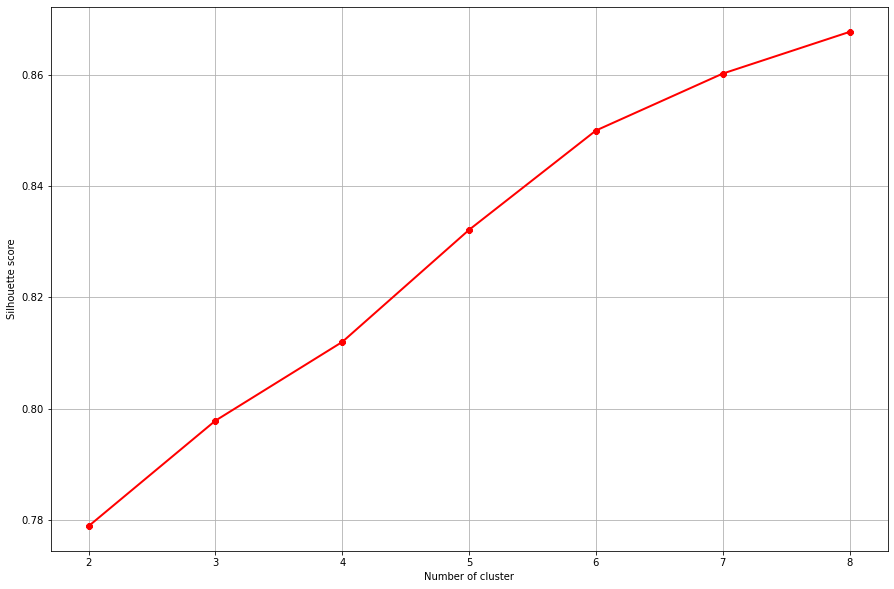

In [39]:
plt.figure(figsize=(15,10))
plt.grid()
plt.plot(list(silhouette_isomap.keys()), list(silhouette_isomap.values()),linewidth=2, color="red", marker ="8")
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette score")
plt.show()

## Répartition des clients en groupes similaires à l'aide de l'algorithm ML non supervisé KMeans

In [41]:
 KMModel = KMeans(n_clusters=9, 
                     init='k-means++', 
                     n_init=10, 
                     max_iter=300, 
                     tol=0.0001, 
                     precompute_distances='auto', 
                     verbose=0, 
                     random_state=1, 
                     copy_x=True, 
                     n_jobs=1, 
                     algorithm='auto')

In [43]:
KMModel.fit(X_isomap9)

C:\Users\adele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning:

'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect

C:\Users\adele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).



KMeans(n_clusters=9, n_jobs=1, precompute_distances='auto', random_state=1)

In [44]:
# Les points de nodes 
kmeans_isomap_labels = KMModel.labels_

In [58]:
X_isomap9.shape

(126527, 9)

In [55]:
# Créeer un dataframe pour les dimentions réduites
df_isomap_9D = pd.DataFrame(X_isomap9, columns=list(range(9)))

In [56]:
df_isomap_9D.head()

,0,1,2,3,4,5,6,7,8
0,0.029439,-0.130457,0.031594,0.112309,0.044702,-0.009400,0.018151,-0.005535,0.002763
1,0.029439,-0.130457,0.031594,0.112309,0.044702,-0.009400,0.018151,-0.005535,0.002763
2,-4.966511,1.973634,9.459372,2.412930,-1.605676,-1.785153,1.014250,0.595454,-0.060669
3,0.029420,-0.130249,0.031528,0.111821,0.044471,-0.009338,0.017968,-0.005455,0.002714
4,0.029439,-0.130457,0.031594,0.112309,0.044702,-0.009400,0.018151,-0.005535,0.002763


## Analyse clusters sur les données dont les dimentions ont été réduites par isomap

For n_clusters = 6 The average silhouette_score is : 0.848949936074212
For n_clusters = 7 The average silhouette_score is : 0.8564014359955644
For n_clusters = 8 The average silhouette_score is : 0.8675639186827875
For n_clusters = 9 The average silhouette_score is : 0.8764385770076164


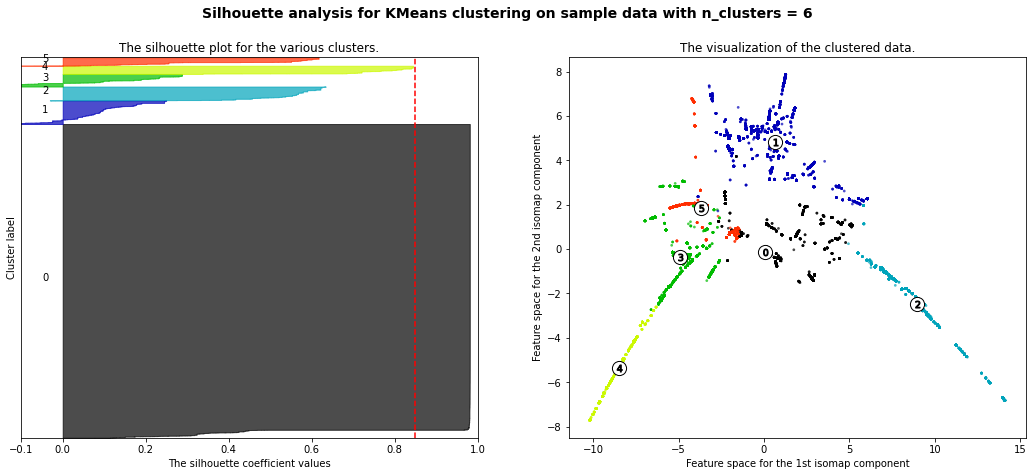

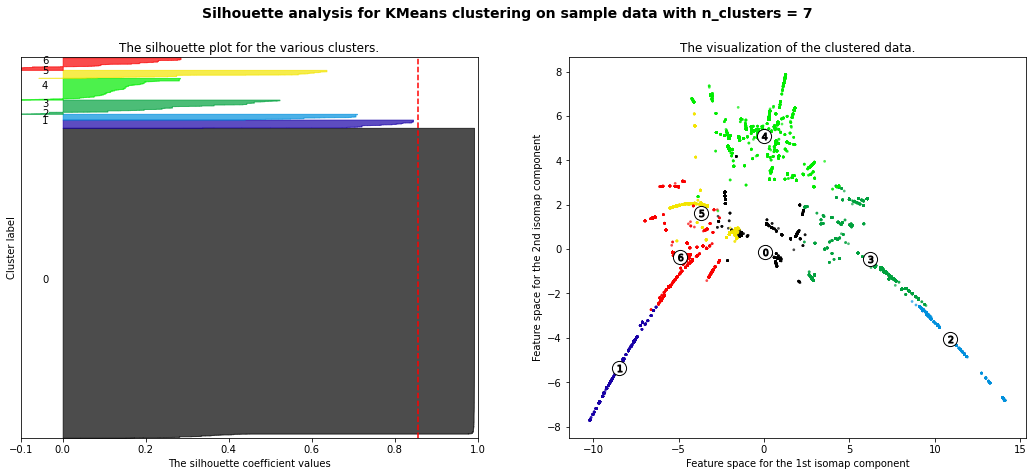

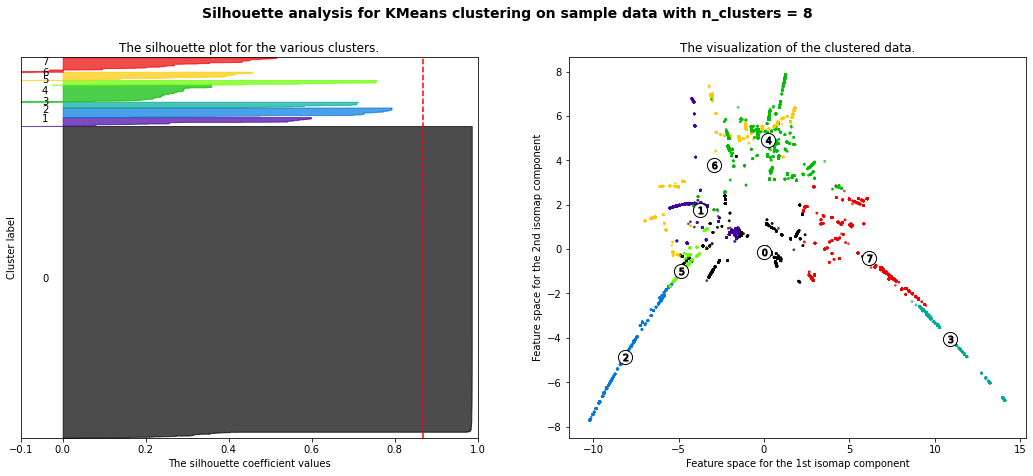

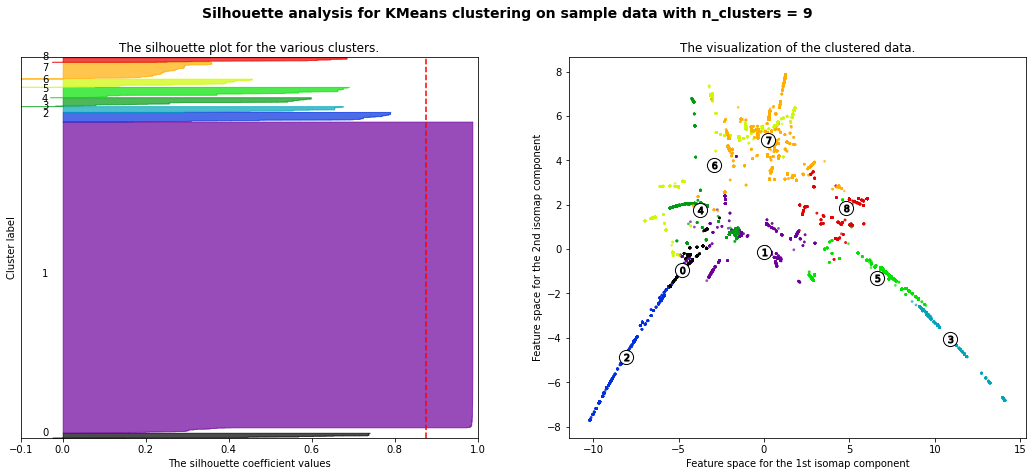

In [57]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np



X=df_isomap_9D
y_pred= kmeans_isomap_labels
range_n_clusters = [6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
 
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_isomap_9D.iloc[:,0], df_isomap_9D.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st isomap component")
    ax2.set_ylabel("Feature space for the 2nd isomap component")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Essai N° 2

La visualization de scores de silouheuutte montre des valeurs négative pour ce qui concerne les distances en tre les points du même cluster,
cela signifie que les cluster ne sont pas bien formés.

On fera quelques manipulations sur notre jeu de données afin de rendre toutes les valeurs positives, on tentera ainsi d'uniformiser les données etafin d'obtenir des clusters plus pertinents.

On procédera de façon identique que précedemment.


In [79]:
from numpy import clip
for value in processed_data:
    # clip pixel values to the range [-1,1] this will positive the negative values (values smaller than -1 will become -1 and values larger than 1 become 1)
    processed_data2 = clip(processed_data, -1.0, 1.0)
    # rescale the values from [-1,1] to [0,1] with 0.5 mean
    processed_data2 = (processed_data2 + 1.0) / 2.0

In [80]:
processed_data2.head()

,review_score,product_category_fashion,product_category_groceries,product_category_home_$_electonics,product_category_leisure,payment_type_boleto,payment_type_credit_card,Region_Central_West_region,Region_Northeast_region,Region_South_region,Region_Southesar_region,delivery_season_autumn,delivery_season_spring,delivery_season_summer,delivery_season_winter
0,0.607412,0.448469,0.387652,0.752547,0.425257,0.40538,0.615639,0.472895,0.454508,0.431327,0.653031,0.425103,0.851154,0.331878,0.391865
1,0.482412,0.448469,0.887652,0.252547,0.425257,0.40538,0.615639,0.472895,0.454508,0.431327,0.653031,0.425103,0.851154,0.331878,0.391865
2,0.357412,0.448469,0.887652,0.252547,0.425257,0.40538,0.615639,0.472895,0.454508,0.931327,0.153031,0.425103,0.851154,0.331878,0.391865
3,0.482412,0.448469,0.387652,0.752547,0.425257,0.40538,0.615639,0.472895,0.454508,0.431327,0.153031,0.925103,0.351154,0.331878,0.391865
4,0.607412,0.448469,0.387652,0.752547,0.425257,0.40538,0.615639,0.472895,0.454508,0.431327,0.653031,0.925103,0.351154,0.331878,0.391865


# Clustering sur les features avant réduction dimentionnelle

In [117]:
# Calcule de score de silhoutte pour determiner le nombre optimal de clusters
silhouette_isomap_positive =  {}
for k in range(2, 9):
    # seed of 42 for reproducibility.
    kmeans_positive = KMeans(n_clusters=k, max_iter=300,
                    init='k-means++', 
                     n_init=9,  
                     tol=0.0001, 
                     precompute_distances='auto', 
                     verbose=0, 
                     random_state=1, 
                     copy_x=True, 
                     n_jobs=1, 
                     algorithm='auto').fit(processed_data2)
    if k == 3: labels = kmeans_positive.labels_
    clusters_positive = kmeans_positive.labels_
    
    silhouette_isomap_positive[k] = silhouette_score(processed_data2,clusters_positive)

C:\Users\adele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning:

'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect

C:\Users\adele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).

C:\Users\adele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning:

'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect

C:\Users\adele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).

C:\Users\adele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning:

'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect

C:\Users\ade

In [118]:
silhouette_isomap_positive

{2: 0.16435511682709894,
 3: 0.21478962092315793,
 4: 0.1667233351659022,
 5: 0.22674580921291523,
 6: 0.23101883935075565,
 7: 0.23840406521506383,
 8: 0.2547158129138931}

Les scores de silhouette sur les données non réduits ne sont pas interessants , nous allons donc réduire les dimentions 

In [94]:
# Réduction en 9 dimentions des 15 features
embed9_positive = Isomap(n_components=9, n_jobs = 4, n_neighbors = 5)
embed9_positive.fit(processed_data2.iloc[0:5000,:])
X_isomap9_positive = embed9_positive.transform(processed_data2)

In [95]:
# Calcule de score de silhoutte pour determiner le nombre optimal de clusters
silhouette_isomap_positive =  {}
for k in range(2, 9):
    # seed of 42 for reproducibility.
    kmeans_positive = KMeans(n_clusters=k, max_iter=300,
                    init='k-means++', 
                     n_init=9,  
                     tol=0.0001, 
                     precompute_distances='auto', 
                     verbose=0, 
                     random_state=1, 
                     copy_x=True, 
                     n_jobs=1, 
                     algorithm='auto').fit(X_isomap9_positive)
    if k == 3: labels = kmeans_positive.labels_
    clusters_positive = kmeans_positive.labels_
    
    silhouette_isomap_positive[k] = silhouette_score(X_isomap9_positive,clusters_positive)

C:\Users\adele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning:

'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect

C:\Users\adele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).

C:\Users\adele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning:

'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect

C:\Users\adele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).

C:\Users\adele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning:

'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect

C:\Users\ade

In [96]:
silhouette_isomap_positive

{2: 0.5906375861531707,
 3: 0.6351957015084376,
 4: 0.6619131461475124,
 5: 0.6793086004221901,
 6: 0.7083599941398514,
 7: 0.735032672458405,
 8: 0.7545390994514797}

Les scores de silhouette sont bien plus élevés après la réduction de dismentions avec ISOMAP qu'avant la réduction

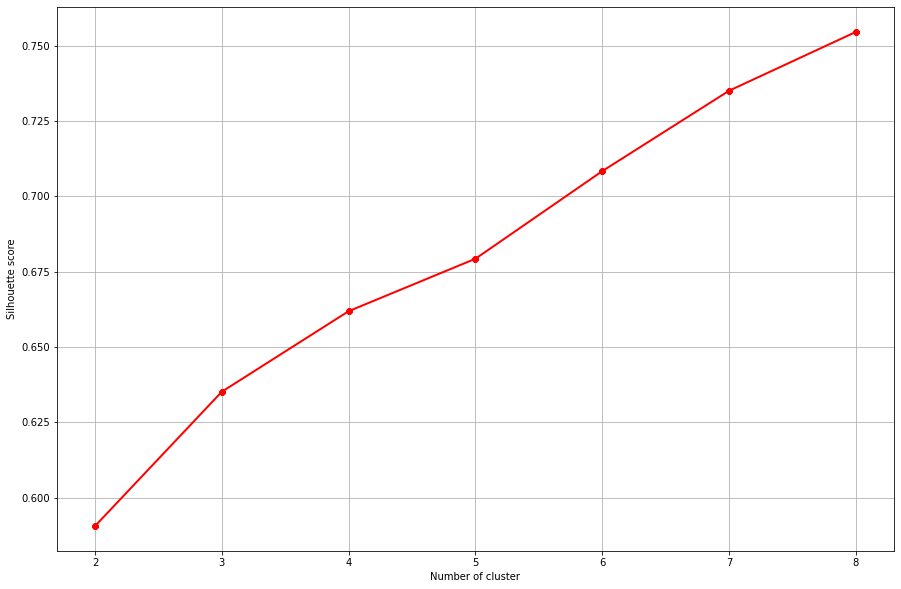

In [97]:
plt.figure(figsize=(15,10))
plt.grid()
plt.plot(list(silhouette_isomap_positive.keys()), list(silhouette_isomap_positive.values()),linewidth=2, color="red", marker ="8")
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette score")
plt.show()

In [98]:
 KMModel2 = KMeans(n_clusters=9, 
                     init='k-means++', 
                     n_init=10, 
                     max_iter=300, 
                     tol=0.0001, 
                     precompute_distances='auto', 
                     verbose=0, 
                     random_state=1, 
                     copy_x=True, 
                     n_jobs=1, 
                     algorithm='auto')

In [99]:
KMModel2.fit(X_isomap9_positive)

C:\Users\adele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning:

'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect

C:\Users\adele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).



KMeans(n_clusters=9, n_jobs=1, precompute_distances='auto', random_state=1)

In [100]:
# Créeer un dataframe pour les dimentions réduites
df_isomap_9D_positive = pd.DataFrame(X_isomap9_positive, columns=list(range(9)))

In [121]:
df_isomap_9D_positive.head()

,0,1,2,3,4,5,6,7,8
0,0.063169,0.116009,0.113269,-0.002078,0.022265,-0.015681,0.031550,0.043861,0.023679
1,0.062281,0.114026,0.107462,-0.001912,0.020322,-0.014132,0.027904,0.038272,0.019935
2,0.062566,0.114662,0.109247,-0.001960,0.020882,-0.014567,0.028881,0.039708,0.020747
3,-1.639669,-3.830982,1.136359,1.208819,0.898478,-0.596322,0.212756,-0.422717,0.103113
4,-1.732541,-4.076434,1.391617,1.360165,1.090809,-0.723546,0.338111,-0.332312,0.233101


In [122]:
df_isomap_9D_positive.shape

(126527, 9)

In [101]:
# Les points de nodes 
kmeans_isomap_labels_positive = KMModel2.labels_

For n_clusters = 6 The average silhouette_score is : 0.7179052666774429
For n_clusters = 7 The average silhouette_score is : 0.7359173503746864
For n_clusters = 8 The average silhouette_score is : 0.7658436681638171
For n_clusters = 9 The average silhouette_score is : 0.7905493849028215


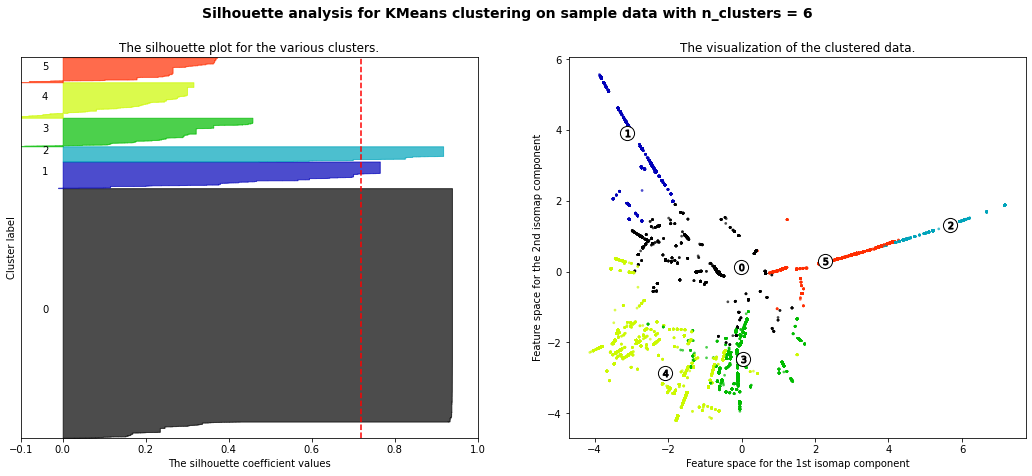

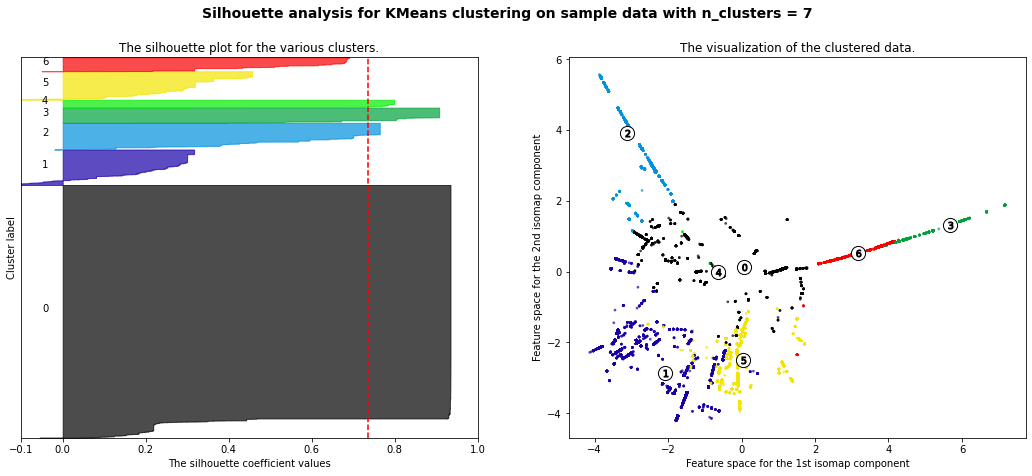

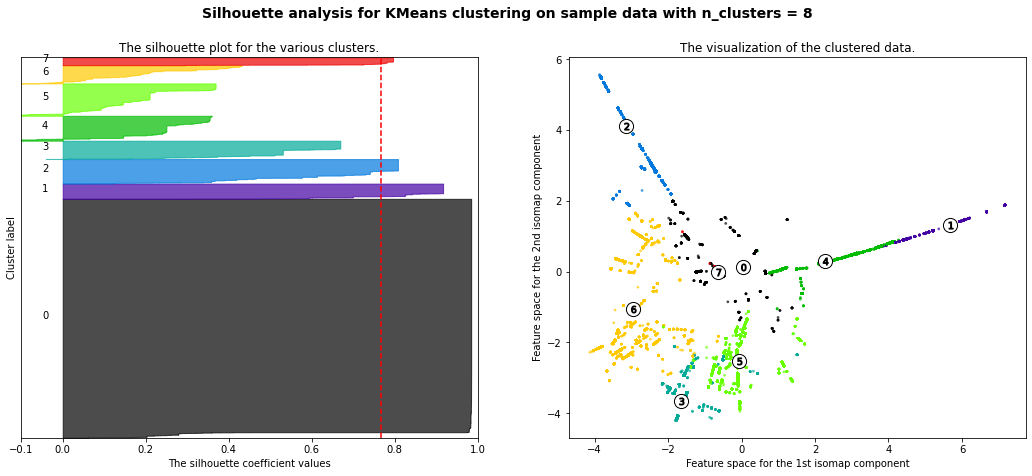

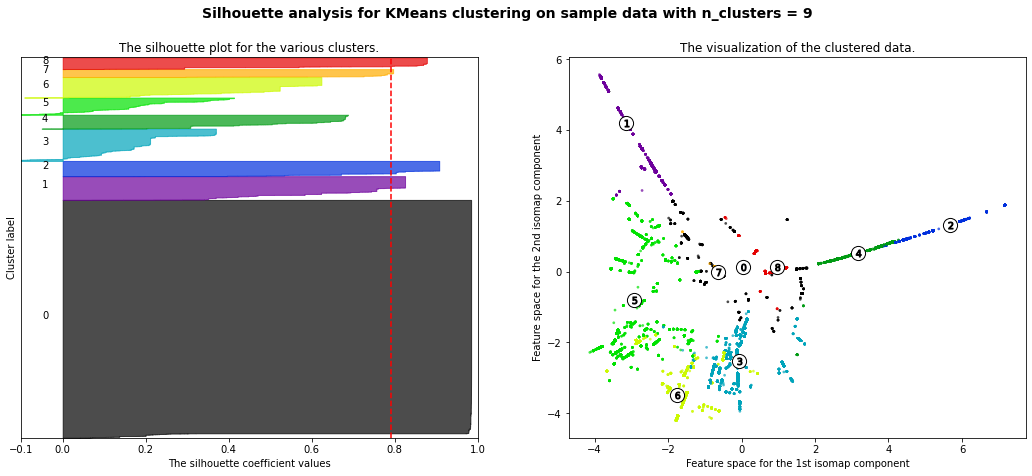

In [102]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np



X=df_isomap_9D_positive
y_pred= kmeans_isomap_labels_positive
range_n_clusters = [6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
 
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_isomap_9D_positive.iloc[:,0], df_isomap_9D_positive.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st isomap component")
    ax2.set_ylabel("Feature space for the 2nd isomap component")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

For n_clusters = 5 The average silhouette_score is : 0.6765727424337742


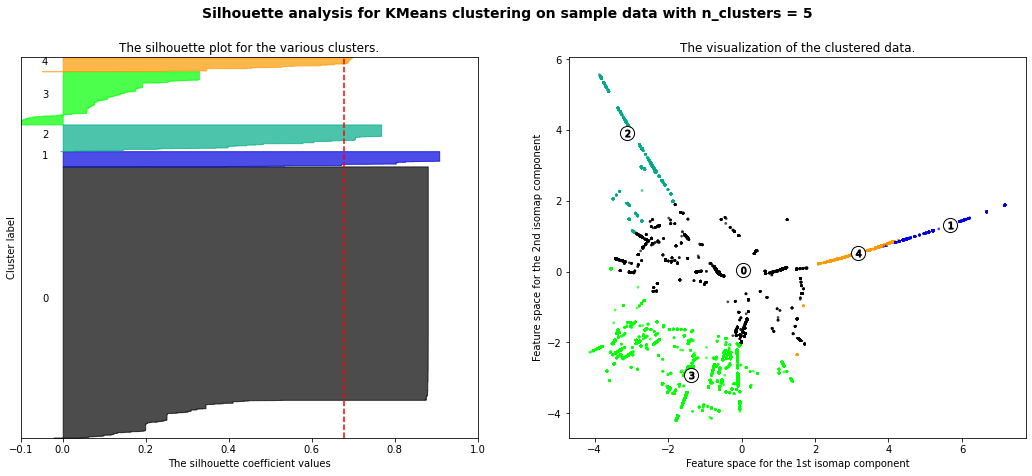

In [119]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np



X=df_isomap_9D_positive
y_pred= kmeans_isomap_labels_positive
range_n_clusters = [(5)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
 
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_isomap_9D_positive.iloc[:,0], df_isomap_9D_positive.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st isomap component")
    ax2.set_ylabel("Feature space for the 2nd isomap component")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Essai N°3 

In [82]:
from numpy import clip
for value in df_isomap_9D_positive:
    # clip pixel values to the range [-1,1] this will positive the negative values (values smaller than -1 will become -1 and values larger than 1 become 1)
    embed9_positive2 = clip(df_isomap_9D_positive, -1.0, 1.0)
    # rescale the values from [-1,1] to [0,1] with 0.5 mean
    embed9_positive2 = (embed9_positive2 + 1.0) / 2.0

In [83]:
embed9_positive2.head()

,0,1,2,3,4,5,6,7,8
0,0.481204,0.464189,0.593954,0.508151,0.548735,0.489828,0.506515,0.512051,0.498770
1,1.000000,0.296436,1.000000,0.786669,0.231595,0.392468,0.665087,0.534063,0.561168
2,1.000000,0.349728,0.960560,0.702074,0.234776,0.476461,0.576701,0.451242,0.541970
3,0.606633,0.009537,0.000000,0.726179,0.334135,0.324480,0.575530,0.299169,0.532951
4,0.612287,0.000000,0.000000,0.751007,0.344054,0.281009,0.593494,0.282595,0.551298


In [84]:
KMModel_3 = KMeans(n_clusters=9, 
                     init='k-means++', 
                     n_init=10, 
                     max_iter=300, 
                     tol=0.0001, 
                     precompute_distances='auto', 
                     verbose=0, 
                     random_state=1, 
                     copy_x=True, 
                     n_jobs=1, 
                     algorithm='auto')

In [85]:
KMModel_3.fit(embed9_positive2)

C:\Users\adele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning:

'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect

C:\Users\adele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).



KMeans(n_clusters=9, n_jobs=1, precompute_distances='auto', random_state=1)

In [87]:
# Créeer un dataframe pour les dimentions réduites
df_isomap_9D_positive2 = pd.DataFrame(embed9_positive2, columns=list(range(9)))

In [88]:
df_isomap_9D_positive2.head()

,0,1,2,3,4,5,6,7,8
0,0.481204,0.464189,0.593954,0.508151,0.548735,0.489828,0.506515,0.512051,0.498770
1,1.000000,0.296436,1.000000,0.786669,0.231595,0.392468,0.665087,0.534063,0.561168
2,1.000000,0.349728,0.960560,0.702074,0.234776,0.476461,0.576701,0.451242,0.541970
3,0.606633,0.009537,0.000000,0.726179,0.334135,0.324480,0.575530,0.299169,0.532951
4,0.612287,0.000000,0.000000,0.751007,0.344054,0.281009,0.593494,0.282595,0.551298


In [90]:
# Les points de nodes 
kmeans_isomap_labels_positive2 = KMModel_3.labels_

For n_clusters = 6 The average silhouette_score is : 0.490628818210699
For n_clusters = 7 The average silhouette_score is : 0.5489500290364425
For n_clusters = 8 The average silhouette_score is : 0.5879956020392881
For n_clusters = 9 The average silhouette_score is : 0.6398621871518173


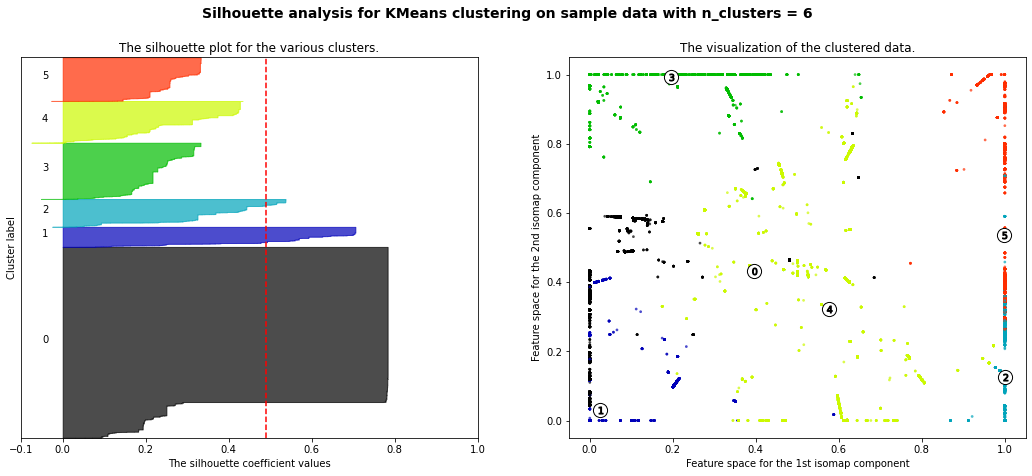

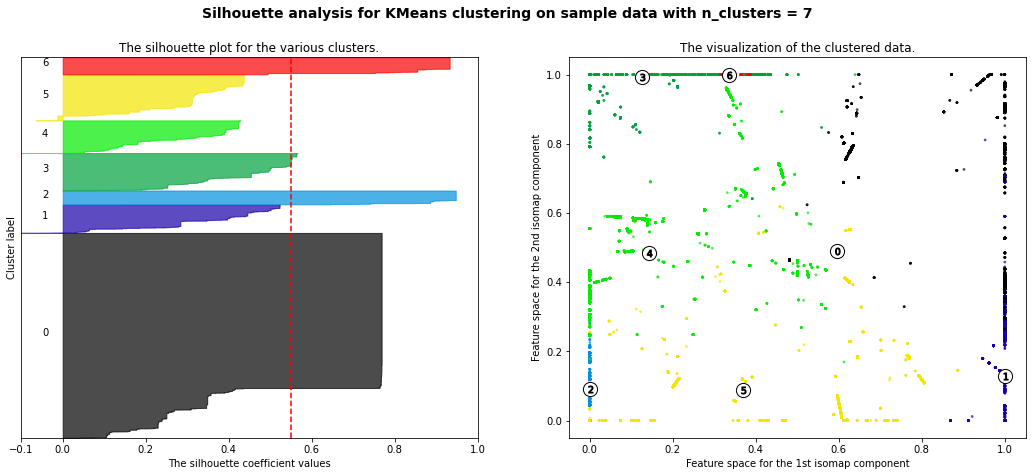

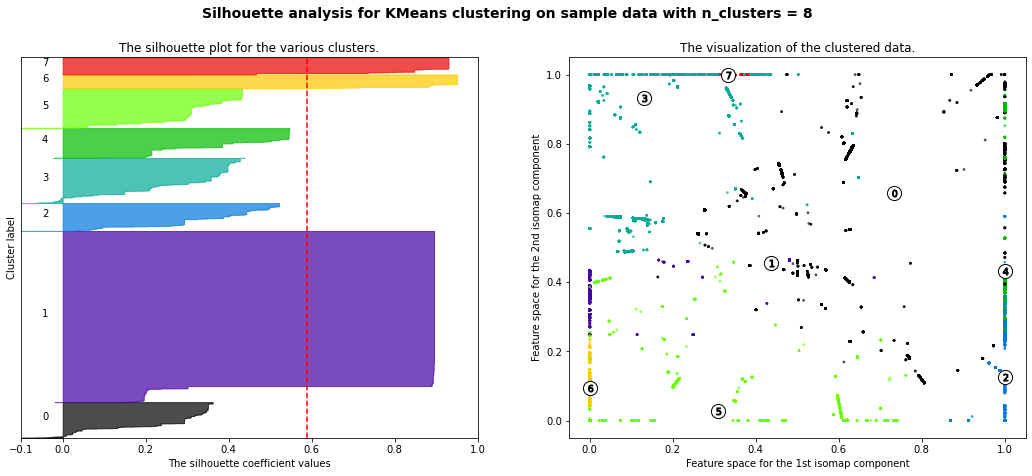

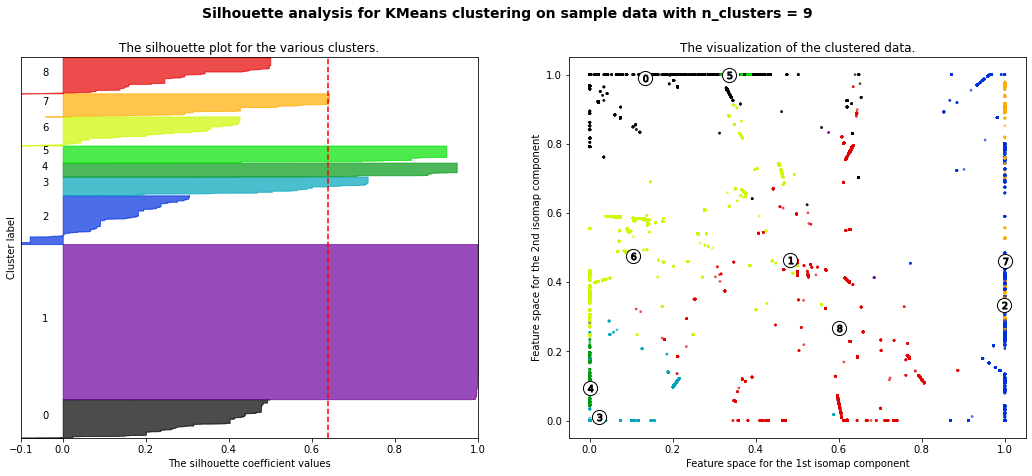

In [91]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np



X=df_isomap_9D_positive2
y_pred= kmeans_isomap_labels_positive2
range_n_clusters = [6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
 
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_isomap_9D_positive2.iloc[:,0], df_isomap_9D_positive2.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st isomap component")
    ax2.set_ylabel("Feature space for the 2nd isomap component")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Essai N° 4 avec La réduction de dimention par PCA

In [105]:

# define transform
pca = PCA()
# prepare transform on dataset
pca.fit(processed_data2)
# apply transform to dataset
transformed = pca.transform(processed_data2)

In [109]:
# Créeer un dataframe pour les dimentions réduites
df_PCA_9D = pd.DataFrame(transformed, columns=list(range(15)))

In [110]:
df_PCA_9D.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.311569,-0.320980,-0.197381,-0.124849,-0.212486,-0.052193,-0.028769,-0.030955,-0.034615,-0.112751,-0.005493,-0.007386,-0.004048,-0.000168,2.290903e-14
1,0.327652,-0.400359,-0.051684,-0.176293,-0.242123,-0.275171,0.042881,-0.062167,0.010126,0.021833,-0.005366,-0.008936,-0.007899,-0.003180,2.293679e-14
2,0.343066,-0.391568,0.069024,0.469472,-0.237782,-0.287005,0.017078,-0.159260,-0.169317,0.218130,-0.056860,-0.006442,-0.009402,-0.012285,2.293679e-14
3,-0.231664,-0.022598,-0.138177,0.295765,0.142161,0.141577,0.458026,-0.011646,0.074964,0.009595,0.072299,-0.008621,-0.009149,0.236622,2.235392e-14
4,-0.251026,-0.028550,-0.214139,-0.124581,0.137203,0.149569,0.466041,-0.053139,-0.037761,-0.065781,-0.006352,-0.007391,-0.002203,-0.000561,2.224290e-14


In [112]:
KMModel = KMeans(n_clusters=9, 
                     init='k-means++', 
                     n_init=10, 
                     max_iter=300, 
                     tol=0.0001, 
                     precompute_distances='auto', 
                     verbose=0, 
                     random_state=1, 
                     copy_x=True, 
                     n_jobs=1, 
                     algorithm='auto')

In [113]:
KMModel.fit(df_PCA_9D)

C:\Users\adele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning:

'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect

C:\Users\adele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).



KMeans(n_clusters=9, n_jobs=1, precompute_distances='auto', random_state=1)

In [114]:
# Les points de nodes 
kmeans_PCA_labels = KMModel.labels_

For n_clusters = 6 The average silhouette_score is : 0.23774213037207614
For n_clusters = 7 The average silhouette_score is : 0.24846269054290193
For n_clusters = 8 The average silhouette_score is : 0.25323870093212003
For n_clusters = 9 The average silhouette_score is : 0.26467579677600667


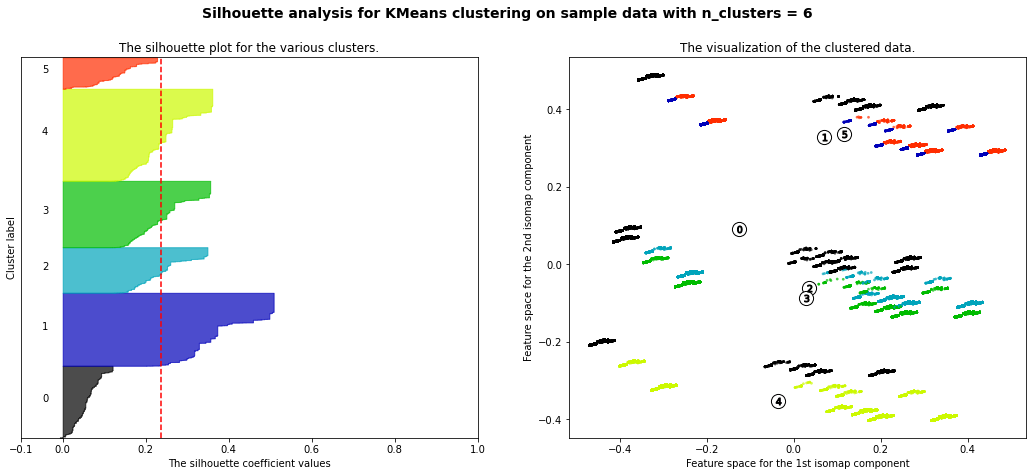

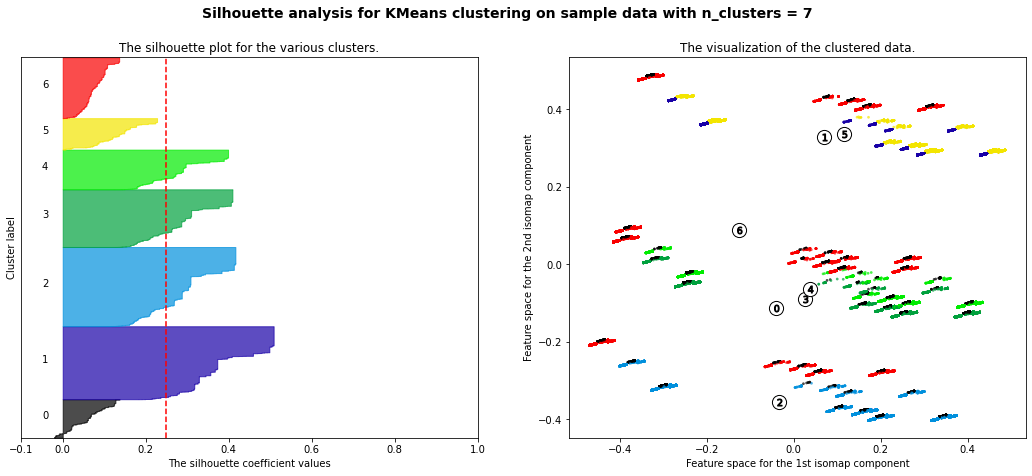

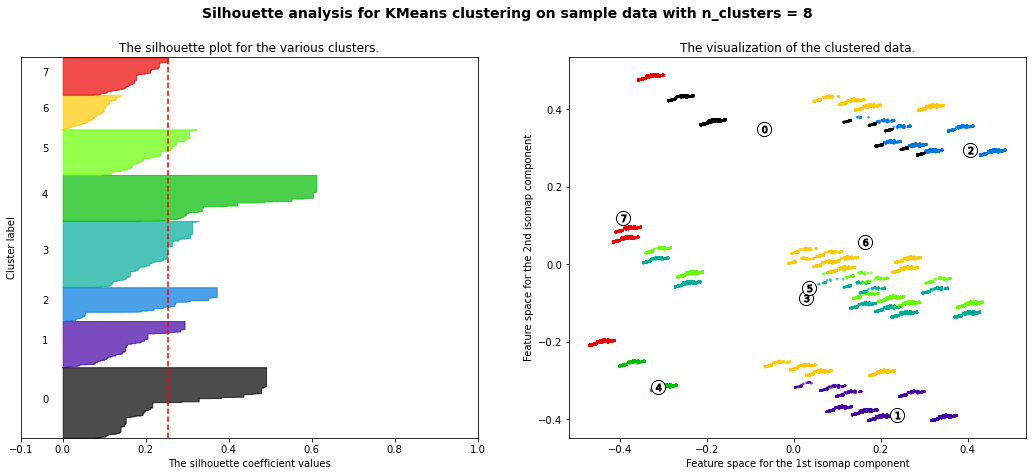

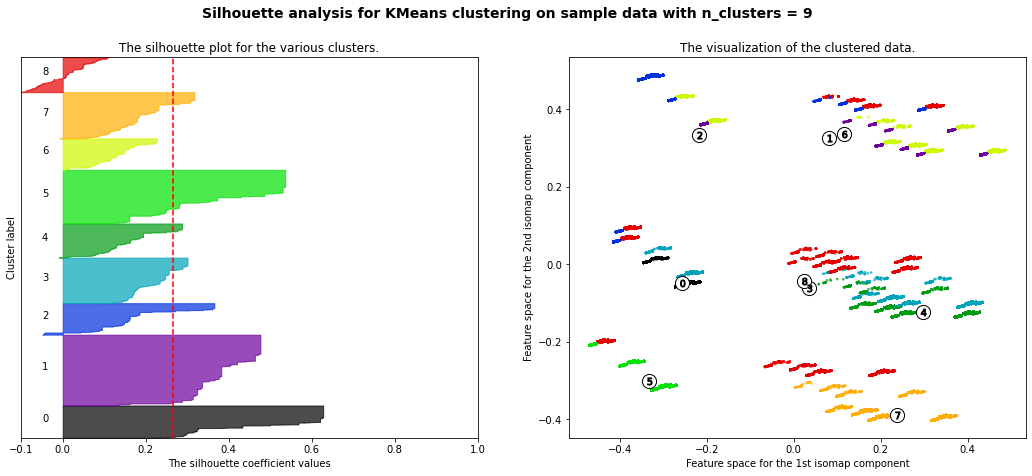

In [115]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np



X=df_PCA_9D
y_pred= kmeans_PCA_labels
range_n_clusters = [6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
 
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_PCA_9D.iloc[:,0], df_PCA_9D.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st isomap component")
    ax2.set_ylabel("Feature space for the 2nd isomap component")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [1]:
sil_score_avant_di_reduction = {6: 0.23101883935075565, 7: 0.23840406521506383, 8: 0.2547158129138931}
sil_score_après_PCA = {6 : 0.23774213037207614, 7 : 0.24846269054290193, 8 : 0.25323870093212003}
sil_score_après_isomap = { 6: 0.7083599941398514, 7: 0.735032672458405, 8: 0.7545390994514797}

In [2]:
sil_score_après_PCA = {6 : 0.23774213037207614, 7 : 0.24846269054290193, 8 : 0.25323870093212003}

In [3]:
sil_score_après_isomap = { 6: 0.7083599941398514, 7: 0.735032672458405, 8: 0.7545390994514797}

 # Analyse métier à l'aide du diagramme de kiviat

In [128]:
# Entrainer un modèle Kmeans 
KMModel2 = KMeans(n_clusters=7, 
                     init='k-means++', 
                     n_init=10, 
                     max_iter=300, 
                     tol=0.0001,  
                     verbose=0, 
                     random_state=1, 
                     copy_x=True,  
                     algorithm='auto')



In [129]:
# Entrainer le modèl eKmeans sur nos données réduites
KMModel2.fit(X_isomap9_positive)


KMeans(n_clusters=7, random_state=1)

In [130]:
# Définir les lables des clusters 
labels_isomap = KMModel2.labels_

In [131]:
# Nous avons besoin des noms de colonnes afin crés une nouvelle dataframe contennat le label de son cluster d'appartenance pour chaque individu
cols=list(processed_data2.columns)

In [132]:
#Nous définissons ici une nouvelle colonne 'groupe' contenant les numéros de clusters
processed_data2['group'] = labels_isomap

In [133]:
# Ajouter la colonne 'groupe'à la dataframe
cols.extend(['group'])


In [134]:
# Regrouper les clients en fonction de leur cluster d'appartenance
grouped_by_cluster = processed_data2.groupby(['group']).mean()


In [137]:
grouped_by_cluster_9f = grouped_by_cluster.iloc[:,:9]


In [138]:
grouped_by_cluster_9f.head()


,review_score,product_category_fashion,product_category_groceries,product_category_home_$_electonics,product_category_leisure,payment_type_boleto,payment_type_credit_card,Region_Central_West_region,Region_Northeast_region
group,,,,,,,,,
0,0.490306,0.486928,0.493239,0.538126,0.481969,0.470478,0.527083,0.488411,0.491508
1,0.521689,0.476065,0.548601,0.315696,0.652402,0.604251,0.398879,0.515333,0.491472
2,0.525563,0.448469,0.847312,0.252547,0.425257,0.405380,0.576881,0.472895,0.497517
3,0.547850,0.448469,0.449146,0.649714,0.453946,0.632653,0.383282,0.545041,0.521086
4,0.514019,0.624923,0.554955,0.277809,0.539747,0.725590,0.284467,0.474992,0.566043


In [142]:
grouped_by_cluster_9f =grouped_by_cluster_9f.reset_index() 

### Nous allons maintenant réaliser le diagramme en radar ou kiviat chart.
### En comparant visuellemnt les differents clusters, nous pouvons voir à quels catégories appartiennet les clients qui se situent dans le même cluster.

In [147]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = grouped_by_cluster_9f
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):
 
    # number of variable
    categories=list(grouped_by_cluster_9f)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(3,3,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=20)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0,0.5,1], ["0","50","100"], color="grey", size=20)
    plt.ylim(0,1)

    # Ind1
    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=25, color=color, y=1.1)

    # ------- PART 2: Apply to all individuals
    # initialize the figure
    my_dpi=96
    

    # Create a color palette:
    

    # Loop to plot

    

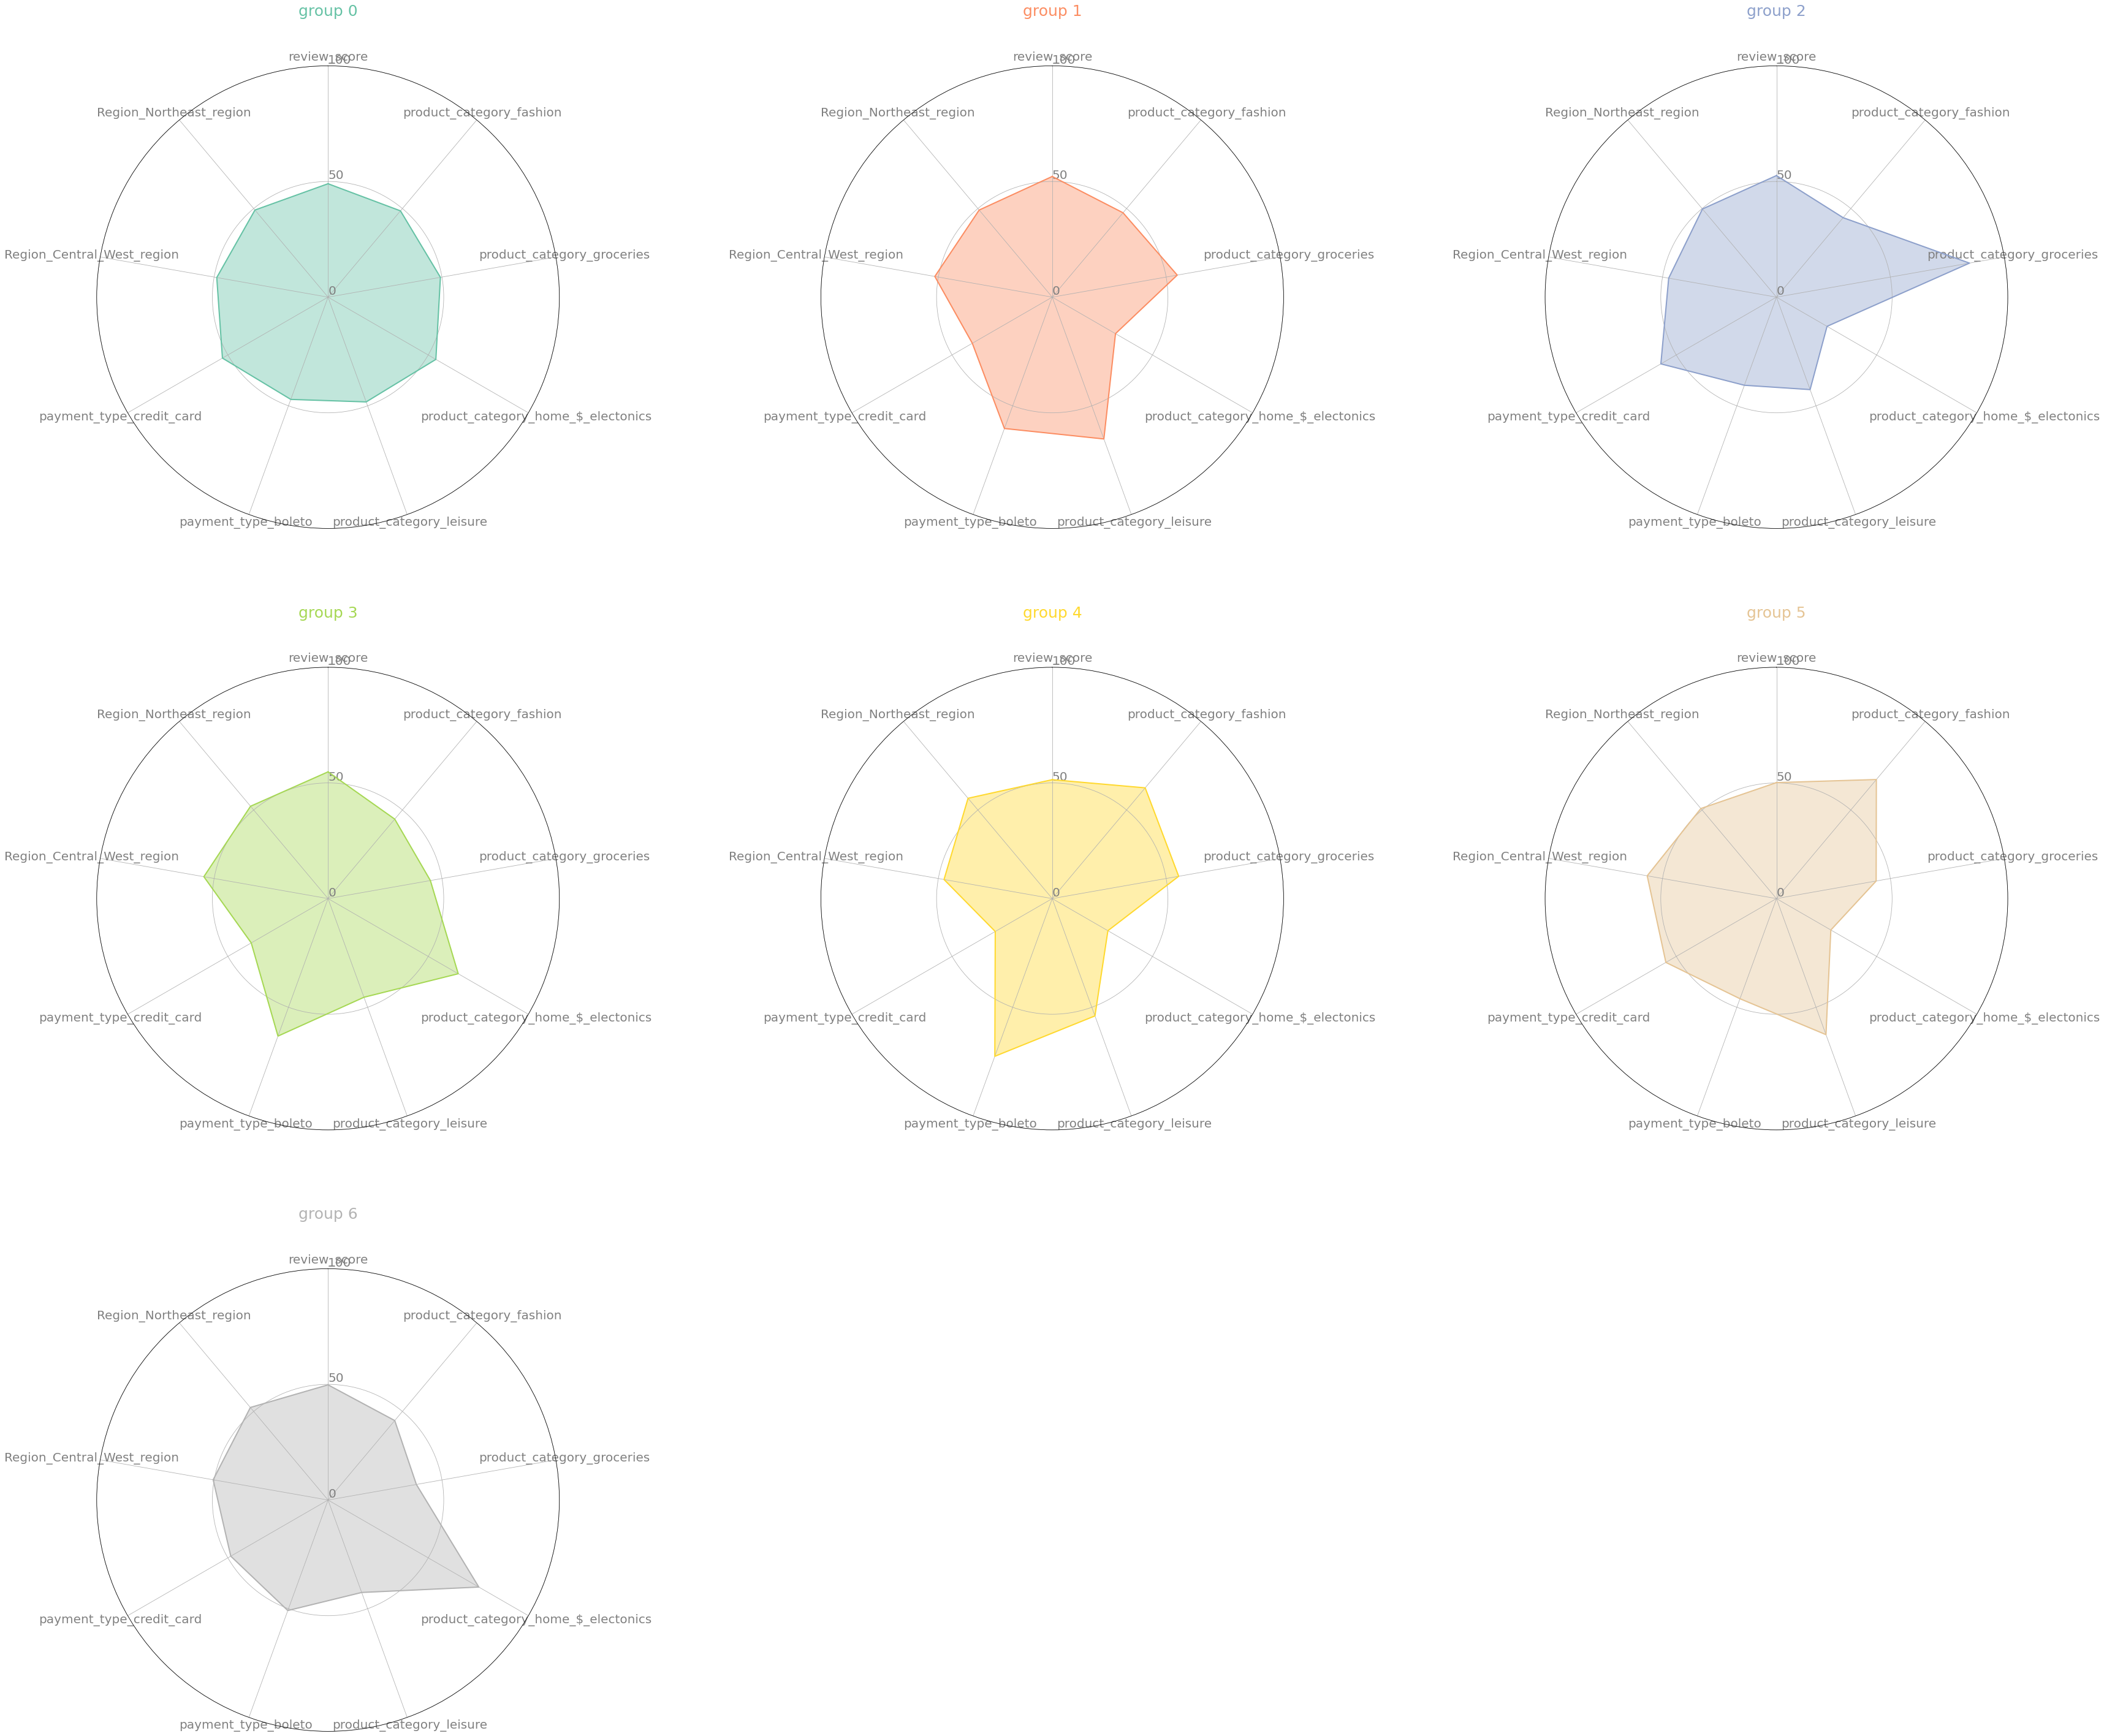

In [148]:
plt.figure(figsize=(60, 50))
plt.subplots_adjust(hspace=.3)
my_palette = plt.cm.get_cmap("Set2", len(df.index))
for row in range(0, len(df.index)):
    make_spider( row=row, title='group '+str(df['group'][row]), color=my_palette(row))

Analyse du diagramme en radar: 

    Groupe 0: caractérisé par toutes les variables 
    Groupe 1: payment type baleto, product category leisure
    Groupe 2: paymenet type credit card, product categorie groceries
    Groupe 3: payement type boleto, product catefory home and electronics
    Groupe 4: product category fashion, payment type boleto
    Groupe 5: product category leisur and fashion
    Groupe 6: product category home and electronics

Le résultat n'est pas très concluant car les variables decrivant les clients ne sont pas assez distinctifs
Plusieurs groupes ont des features caracteristiques similaires


### Proposition de contrat de maintenance pour le modèle